In [5]:
# 67の前半と同じ

from gensim.models import KeyedVectors
import polars as pl

# モデルのロード
model = KeyedVectors.load_word2vec_format("./GoogleNews-vectors-negative300.bin.gz", binary=True)

# country.csvは国名一覧が描かれrているテキストファイル
df = pl.read_csv("country.csv", separator="\t", new_columns=["country"])

# モデルに含まれている国名のみを抽出したリスト([国名,ベクトル]のリスト)
country_in_model = [country for country in df["country"].to_list() if country in model]

import torch
import numpy as np

country_vectors = torch.stack([torch.from_numpy(model[country].astype(np.float32)) for country in country_in_model])

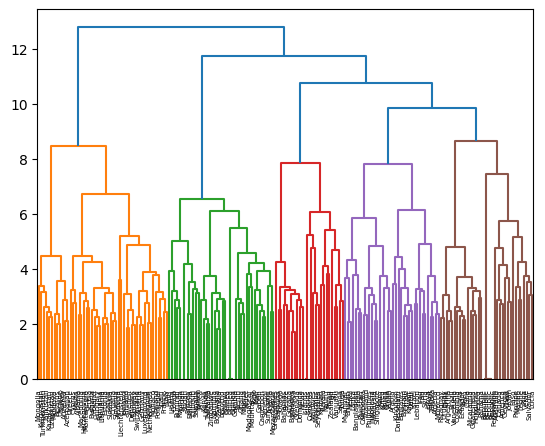

In [12]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

linkage = hierarchy.linkage(country_vectors, method='ward')

hierarchy.dendrogram(Z=linkage, labels=country_in_model)
plt.savefig("dendrogram.png")